In [110]:
import pandas as pd

In [111]:
df = pd.read_csv("https://raw.githubusercontent.com/nataliavalentin/base-cervejas/master/Heineken_Consumo_aula.csv")

df.info() # Verificando os tipos de dados e colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         368 non-null    object 
 1   Temperatura Media (C)        368 non-null    object 
 2   Temperatura Minima (C)       366 non-null    object 
 3   Temperatura Maxima (C)       367 non-null    object 
 4   Precipitacao (mm)            368 non-null    object 
 5   Final de Semana              367 non-null    float64
 6   Consumo de cerveja (litros)  368 non-null    float64
dtypes: float64(2), object(5)
memory usage: 20.3+ KB


In [112]:
df.sample(5) # Verificando 5 amostras aleatórias

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
218,2015-08-04,"21,04","15,2","27,4",0,0.0,27.724
179,2015-06-26,"15,26",12,"20,9",0,0.0,21.860
245,2015-08-31,"24,54","16,6","32,2",0,0.0,28.441
330,2015-11-24,"21,36","19,3","22,6",7,0.0,21.689
57,2015-02-24,"24,3","20,5","31,9",0,0.0,26.959


In [113]:
df.columns = df.columns.str.replace(" ", "_") # Substituindo espaços por underline na colunas
df.columns = df.columns.str.replace("[)(]", "", regex=True) # Removendo parênteses
df.columns = df.columns.str.lower() # Transformando as colunas em minúsculas

df.head()

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana,consumo_de_cerveja_litros
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
2,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
3,2015-01-03,"24,82","22,4",NaN,0,1.0,30.814
4,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799


In [114]:
df.rename(columns={"consumo_de_cerveja_litros":"consumo"}, inplace=True) # Renomeando a coluna consumo_de_cerveja_(litros) para consumo

In [115]:
df.head()

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana,consumo
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
2,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
3,2015-01-03,"24,82","22,4",NaN,0,1.0,30.814
4,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799


# Verificar se existem dados faltantes

In [116]:
df.isnull().values.any() # Verificando se existem valores faltantes

True

In [117]:
df.isnull().sum() # Verificando a quantidade de valores faltantes por coluna

data                    0
temperatura_media_c     0
temperatura_minima_c    2
temperatura_maxima_c    1
precipitacao_mm         0
final_de_semana         1
consumo                 0
dtype: int64

In [118]:
df['temperatura_maxima_c'] = df['temperatura_maxima_c'].str.replace(",", ".").astype(float) # Substituindo vírgula por ponto e convertendo para float
df['temperatura_media_c'] = df['temperatura_media_c'].str.replace(",", ".").astype(float) # Substituindo vírgula por ponto e convertendo para float
df['temperatura_minima_c'] = df['temperatura_minima_c'].str.replace(",", ".").astype(float) # Substituindo vírgula por ponto e convertendo para float
df['precipitacao_mm'] = df['precipitacao_mm'].str.replace(",", ".").astype(float) # Substituindo vírgula por ponto e convertendo para float

# Organizar as datas em colunas para facilitar as análises, separando dia, mês e ano.

In [119]:
df['data'] = pd.to_datetime(df['data'])
df['mes'] = pd.to_datetime(df['data']).dt.month
df['dia'] = pd.to_datetime(df['data']).dt.day
df['dia_semana'] = pd.to_datetime(df['data']).dt.dayofweek

df.head()

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana,consumo,mes,dia,dia_semana
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1,1,3
1,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1,1,3
2,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1,2,4
3,2015-01-03,24.82,22.4,NaN,0.0,1.0,30.814,1,3,5
4,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1,4,6


In [120]:
df.duplicated().sum()

3

In [121]:
df = df.drop_duplicates() # Removendo linhas duplicadas
df[df.duplicated()]

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana,consumo,mes,dia,dia_semana


In [122]:
df.describe()

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana,consumo,mes,dia,dia_semana
count,365,365.000000,363.000000,364.000000,365.000000,364.000000,365.000000,365.000000,365.000000,365.0
mean,2015-07-02 00:00:00,21.226356,17.436639,26.602473,5.196712,0.285714,25.401367,6.526027,15.720548,3.0
min,2015-01-01 00:00:00,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,1.000000,1.000000,0.0
25%,2015-04-02 00:00:00,19.020000,15.250000,23.800000,0.000000,0.000000,22.008000,4.000000,8.000000,1.0
50%,2015-07-02 00:00:00,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,7.000000,16.000000,3.0
75%,2015-10-01 00:00:00,23.280000,19.500000,29.400000,3.200000,1.000000,28.631000,10.000000,23.000000,5.0
max,2015-12-31 00:00:00,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,12.000000,31.000000,6.0
std,NaN,3.180108,2.812375,4.319852,12.417844,0.452376,4.399143,3.452584,8.808321,2.0


In [123]:
df.dropna(how="any", inplace=True) # Removendo linhas com valores faltantes em qualquer coluna

In [124]:
df.describe()

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana,consumo,mes,dia,dia_semana
count,361,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.00000
mean,2015-07-03 20:24:35.900276992,21.171080,17.410526,26.553186,5.240443,0.282548,25.342424,6.584488,15.803324,2.98892
min,2015-01-01 00:00:00,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,1.000000,1.000000,0.00000
25%,2015-04-05 00:00:00,18.920000,15.200000,23.800000,0.000000,0.000000,22.001000,4.000000,8.000000,1.00000
50%,2015-07-04 00:00:00,21.360000,17.900000,26.800000,0.000000,0.000000,24.862000,7.000000,16.000000,3.00000
75%,2015-10-02 00:00:00,23.180000,19.500000,29.400000,3.200000,1.000000,28.610000,10.000000,23.000000,5.00000
max,2015-12-31 00:00:00,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,12.000000,31.000000,6.00000
std,NaN,3.148306,2.798025,4.293237,12.478133,0.450864,4.369907,3.426074,8.787149,1.99858


Olhando para a base em questão, quais são as possíveis perguntas a serem respondidas por essa base para supor esse consumo:

-- quanto de cerveja foi consumida no final de semana e durante a semana?
*HIPÓTESE:* existe uma relação entre consumo e o dia da semana.*

-- quanto de cerveja foi consumida por mês?
*HIPÓTESE:* existe oscilação de consumo ao longo do ano.*

-- como foi a temperatura para o ano e consumo de cerveja?
*HIPÓTESE:* existe relação entre temperatura e consumo de cerveja*

-- como precipitação influencia no consumo de cerveja?
*HIPÓTESE:* chuva influencia o consumo de cerveja*

In [125]:
import plotly.graph_objects as pg

In [126]:
weekdays = sum(df[df.final_de_semana == 0] ['consumo'])
weekend = sum(df[df.final_de_semana == 1] ['consumo'])

labels = ["dias de semana", "finais de semana"]
values = [weekdays, weekend]
cores = ["crimson"]

grafico = pg.Figure(data = [pg.Bar(x=labels, y=values, marker_color=cores)])
grafico.show()

KeyError: 'consumo_de_cerveja_litros'

In [ ]:
meaWeekdays = (df[df.final_de_semana == 0].consumo_de_cerveja_litros.mean())
meaWeekend = (df[df.final_de_semana == 1].consumo_de_cerveja_litros.mean())

#labels = ["dias de semana", "finais de semana"]
values = [meaWeekdays, meaWeekend]
cores = ["crimson"]

grafico = pg.Figure(data = [pg.Bar(x=labels, y=values, marker_color=cores)])
grafico.show()

In [132]:
# Consumo em cada dia da semana

import plotly.express as px

grafico = px.box(df, x="dia_semana", y="consumo", color="dia_semana", orientation='v',
                 title="Consumo de cerveja por dia da semana", notched=True)
grafico.show()

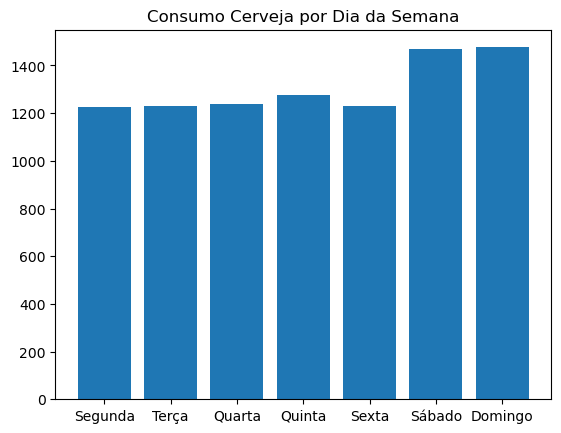

In [135]:
import matplotlib.pyplot as plt

# 0 na Segunda - 6 Domingo

#Consumo por dia da semana:

consumo_dia_semana = df.groupby('dia_semana', as_index = False).consumo.sum()

consumo_dia_semana.dia_semana = consumo_dia_semana.dia_semana.map({0: 'Segunda',
                                   1: 'Terça',
                                   2: 'Quarta',
                                   3: 'Quinta',
                                   4: 'Sexta',
                                   5: 'Sábado',
                                   6: 'Domingo'})

fig, ax = plt.subplots( )
ax.bar(x = consumo_dia_semana.dia_semana.values, height = consumo_dia_semana.consumo.values)
ax.set_title('Consumo Cerveja por Dia da Semana')
plt.show()